# GRIP-The Sparks Foundation  (Task #3)


# Prediction using Decision Tree Algorithm

● For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it 
graphically. 


● The purpose is if we feed any new data to this classifier, it would be able to 
predict the right class accordingly.


### BY - AYUSH KESARWANI


In [1]:
#IMPORT LIBRARIES
try :
    import numpy as np
    import pandas as pd
    import os
    import sklearn.datasets as datasets
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    print("----Libraries Imported successfully----")
except:
    print("----Error in importing Libraries----")

----Libraries Imported successfully----


In [2]:
iris = datasets.load_iris() #load dataset
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])

In [3]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [4]:
df.shape

(150, 5)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null float64
dtypes: float64(5)
memory usage: 6.0 KB


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
features = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
types = df['Species']
xtrain , xtest , ytrain, ytest = train_test_split(features, types, test_size= 0.2, random_state=1)

In [9]:
xtrain.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [10]:
ytrain.head()

91     1.0
135    2.0
69     1.0
128    2.0
114    2.0
Name: Species, dtype: float64

In [11]:
pd.value_counts(df.Species)

2.0    50
1.0    50
0.0    50
Name: Species, dtype: int64

### VISUALIZING THE IRIS DATASET

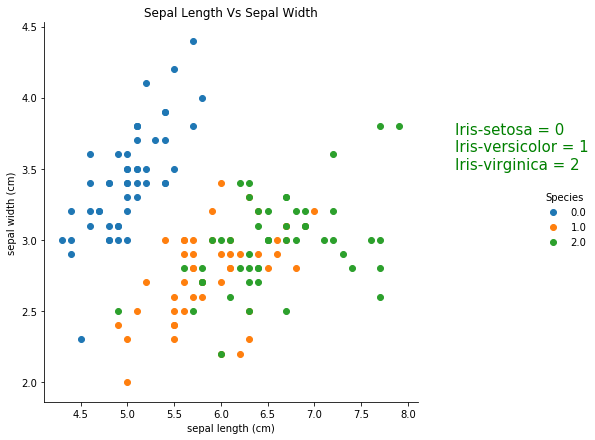

In [12]:
sns.FacetGrid(df,hue='Species', height=6) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()
plt.text(8.5,3.5,'Iris-setosa = 0 \nIris-versicolor = 1\nIris-virginica = 2',fontsize=15, color='g')
plt.title("Sepal Length Vs Sepal Width")
plt.show()

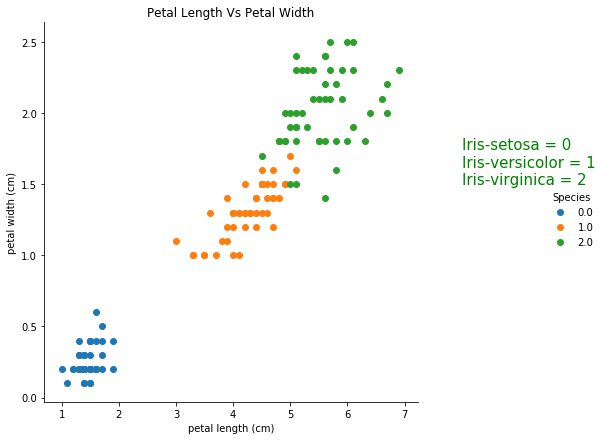

In [13]:
sns.FacetGrid(df,hue='Species', height =6) \
   .map(plt.scatter, 'petal length (cm)','petal width (cm)') \
   .add_legend()
plt.text(8,1.5,'Iris-setosa = 0 \nIris-versicolor = 1\nIris-virginica = 2',fontsize=15, color='g')
plt.title("Petal Length Vs Petal Width")
plt.show()

C:\Users\Ayush\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ayush\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


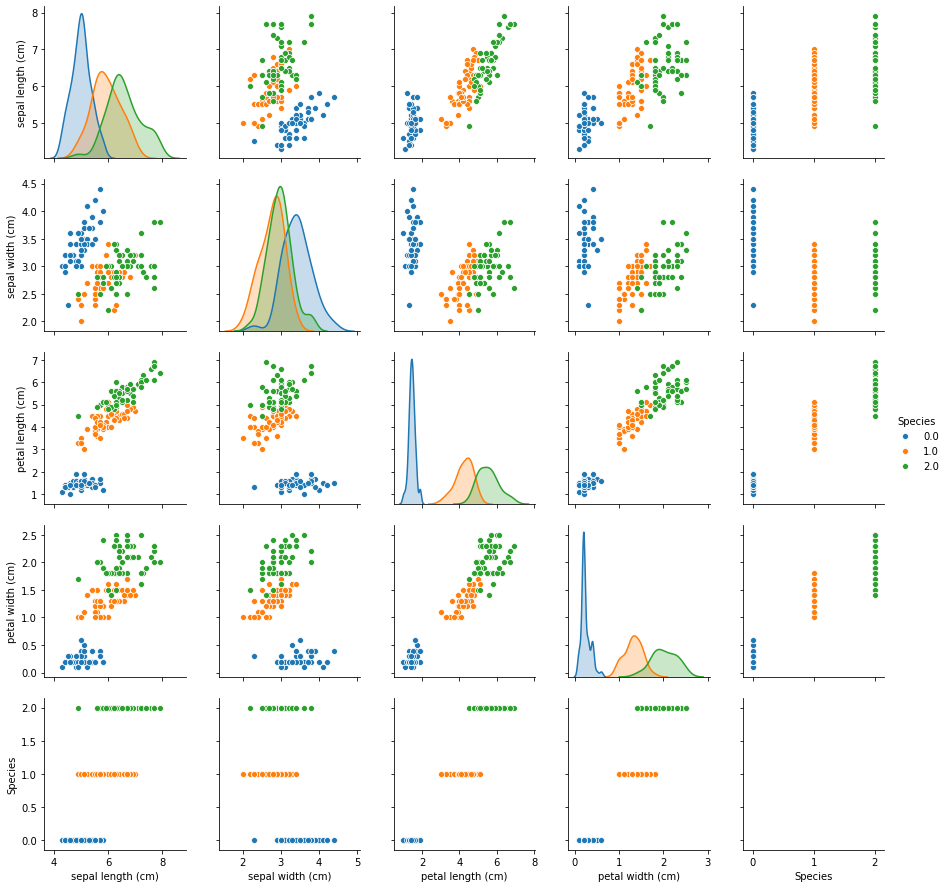

In [26]:
sns.pairplot(df, hue="Species" );
plt.show()

### TRAINING AND DEFINING DECISION TREE ALGORITHM

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(xtrain, ytrain)

In [16]:
print("Depth of tree =", clf.tree_.max_depth)
print("Number of leaf nodes =", clf.get_n_leaves())

Depth of tree = 5
Number of leaf nodes = 8


In [17]:
val = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}

In [18]:
prediction = clf.predict(xtest)
print("Predicted Values\n".center(80))
print(prediction)
print("Species Name Of The Predicted Values\n".center(80))
for i in prediction:
    print(val[i])
    
# Iris-setosa = 0
# Iris-versicolor = 1
# Iris-virginica = 2

                               Predicted Values
                                
[0. 1. 1. 0. 2. 1. 2. 0. 0. 2. 1. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 1. 2. 0.
 2. 1. 0. 0. 1. 2.]
                     Species Name Of The Predicted Values
                      
Iris-setosa
Iris-versicolor
Iris-versicolor
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-virginica
Iris-setosa
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-versicolor
Iris-setosa
Iris-versicolor
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-virginica


In [19]:
from sklearn.metrics import classification_report
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [20]:
print('Training accuracy is ',clf.score(xtrain,ytrain))
print('Test accuracy is ',clf.score(xtest,ytest))

Training accuracy is  1.0
Test accuracy is  0.9666666666666667


### LET'S TEST OUR MODEL ON ANY RANDOM VALUE ?

In [21]:
y_unseen = np.array([[0.1], [3.0], [4.0], [6.0]])
y_unseen = np.transpose(y_unseen)
#print(y_unseen)
#print(y_unseen.shape)
#print(xtest.shape)

In [22]:
pre = clf.predict(y_unseen)
pre = pre.astype(int)
print("----Prediction on unseen value----\n",val[pre[0]])

----Prediction on unseen value----
 Iris-virginica


### NOW LET'S TRAIN OUR MODEL ON DIFFERENT VALUES OF MAX_DEPTH AND MAX_LEAF_NODES AND CHECK WHAT EFFECT IT HAS ON THE ACCURACY 

In [23]:
def pruning_by_max_leaf_nodes(t):
    for i in range(1, t-1):
        clfnxt1 = DecisionTreeClassifier(criterion= 'entropy',max_leaf_nodes=t-i);
        clfnxt1.fit(xtrain,ytrain)
        print('Max_leaf_nodes = ',t-i,'Test Accuracy = ',clfnxt1.score(xtest,ytest))    
    return;

def pruning_by_max_depth(t):
    for i in range(1, t):
        clfnxt2 = DecisionTreeClassifier(criterion= 'entropy',max_depth=t-i);
        clfnxt2.fit(xtrain,ytrain)
        print('Max_depth = ',clfnxt2.tree_.max_depth,'Test Accuracy = ',clfnxt2.score(xtest,ytest)) 
    return;

In [24]:
print('Pruning case1:By reducing the max_depth of the tree')
pruning_by_max_depth(clf.tree_.max_depth)

Pruning case1:By reducing the max_depth of the tree
Max_depth =  4 Test Accuracy =  0.9666666666666667
Max_depth =  3 Test Accuracy =  0.9666666666666667
Max_depth =  2 Test Accuracy =  0.9666666666666667
Max_depth =  1 Test Accuracy =  0.5666666666666667


In [25]:
print('Pruning case2:By reducing the max_leaf_nodes of the tree')
pruning_by_max_leaf_nodes(clf.get_n_leaves());

Pruning case2:By reducing the max_leaf_nodes of the tree
Max_leaf_nodes =  7 Test Accuracy =  0.9666666666666667
Max_leaf_nodes =  6 Test Accuracy =  0.9666666666666667
Max_leaf_nodes =  5 Test Accuracy =  0.9666666666666667
Max_leaf_nodes =  4 Test Accuracy =  0.9666666666666667
Max_leaf_nodes =  3 Test Accuracy =  0.9666666666666667
Max_leaf_nodes =  2 Test Accuracy =  0.5666666666666667
